# Numerical Integration in Python

In [8]:
# Imports required but not shown in the video lecture.
import numpy as np
from numpy import cos, exp, linspace, pi, sin
from matplotlib.pyplot import plot, annotate, fill_between, figure
%matplotlib inline

In [9]:
np.set_printoptions(precision=3)

Integrals are *anti-derivatives*

$$\frac{d}{dx}F(x) = f(x)$$

$$ \Rightarrow F(x) = \int f(x) dx $$

Integrals are also infinitessimal summations. So for a range of x divided into n intervals

$$ F(x) = \lim_{n\rightarrow \infty}\sum_{i=0}^{n-1} f(x_i)(x_{i+1} - x_i)$$

$$\Rightarrow F(x) = \int \limits_{x_0}^{x_n} f(x) dx$$

## Integrating a callable function

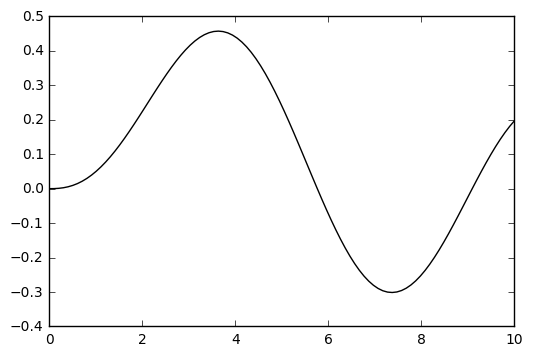

In [10]:
from scipy.special import jv
def f(x):
    return jv(2.5, x)
x = np.linspace(0, 10, 100)
p = plot(x, f(x), 'k-')

Quadrature method of integration

http://en.wikipedia.org/wiki/Numerical_integration#Quadrature_rules_based_on_interpolating_functions

http://www.scipy.org/doc/api_docs/SciPy.integrate.quadrature.html#quadrature


In [11]:
from scipy.integrate import quad
interval = [0, 6.5]
value, max_err = quad(f, *interval)

In [12]:
print value

1.28474297234


In [13]:
print max_err

2.34181851396e-09


integral = 1.284742972
upper bound on error: 2.34e-09


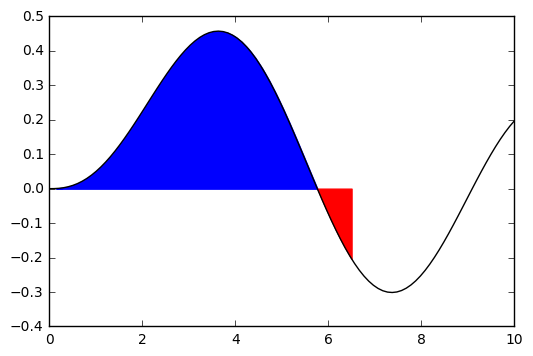

In [14]:
print "integral = {:.9f}".format(value)
print "upper bound on error: {:.2e}".format(max_err)
x = np.linspace(0, 10, 100)
p = plot(x, f(x), 'k-')
x = np.linspace(0, 6.5, 45)
p = fill_between(x, f(x), where=f(x)>0, color="blue")
p = fill_between(x, f(x), where=f(x)<0, color="red", interpolate=True)

In [15]:
from numpy import inf
interval = [0., inf]

In [16]:
def g(x):
    return exp(-x ** 1/2)

upper bound on error: 7.2e-11


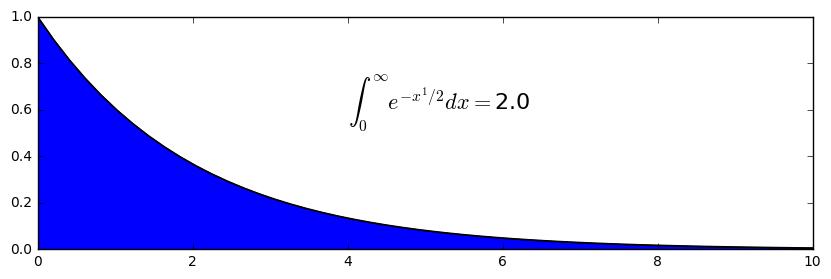

In [17]:
value, max_err = quad(g, *interval)
x = np.linspace(0, 10, 50)
fig = figure(figsize=(10,3))
p = plot(x, g(x), 'k-')
p = fill_between(x, g(x))
annotate(r"$\int_0^{\infty}e^{-x^1/2}dx = $" + "{}".format(value), (4, 0.6),
         fontsize=16)
print "upper bound on error: {:.1e}".format(max_err)

## Double integration

$$ I_n(x) = \int \limits_0^{\infty} \int \limits_1^{\infty} \frac{e^{-xt}}{t^n}dt dx = \frac{1}{n}$$

In [18]:
def h(t, x, n):
    """core function, takes x, t, n"""
    return exp(-x * t) / (t ** n)

In [19]:
from numpy import vectorize
@vectorize
def int_h_dt(x, n):
    """Time integrand of h(x)."""
    return quad(h, 1, inf, args=(x, n))[0]

In [20]:
@vectorize
def I_n(n):
    return quad(int_h_dt, 0, inf, args=(n))

In [21]:
I_n([0.5, 1.0, 2.0, 5])

(array([ 2. ,  1. ,  0.5,  0.2]),
 array([  3.104e-10,   2.601e-09,   1.886e-09,   4.134e-09]))

In [22]:
from scipy.integrate import dblquad
@vectorize
def I(n):
    """Same as I_n, but using the built-in dblquad"""
    x_lower = 0
    x_upper = inf
    return dblquad(h, x_lower, x_upper,
                   lambda t_lower: 1, lambda t_upper: inf, args=(n,))

In [23]:
I([0.5, 1.0, 2.0, 5])

(array([ 2. ,  1. ,  0.5,  0.2]),
 array([  2.103e-06,   6.361e-08,   1.389e-08,   1.368e-08]))

## Integration of sampled data

In [24]:
from scipy.integrate import trapz, simps

In [25]:
x_s = linspace(0, pi, 5)
y_s = sin(x_s)
x = linspace(0, pi, 100)
y = sin(x)

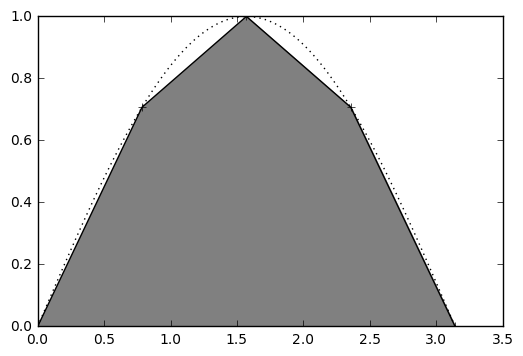

In [26]:
p = plot(x, y, 'k:')
p = plot(x_s, y_s, 'k+-')
p = fill_between(x_s, y_s, color="gray")

In [27]:
result_s = trapz(y_s, x_s)
result_s_s = simps(y_s, x_s)
result = trapz(y, x)
print "Trapezoidal Integration over 5 points : {:.3f}".format(result_s)
print "Simpson Integration over 5 points : {:.3f}".format(result_s_s)
print "Trapezoidal Integration over 100 points : {:.3f}".format(result)

Trapezoidal Integration over 5 points : 1.896
Simpson Integration over 5 points : 2.005
Trapezoidal Integration over 100 points : 2.000


### Numpy UFunc "accumulate" method

In [40]:
type(np.add)

numpy.ufunc

In [41]:
result_np = np.add.accumulate?

In [ ]:
result_np = np.add.accumulate

In [ ]:
result_np = np.add.accumulate

In [30]:
result_np = np.add.accumulate

In [31]:
result_np = np.add.accumulate(y) * (x[1] - x[0]) - (x[1] - x[0]) / 2

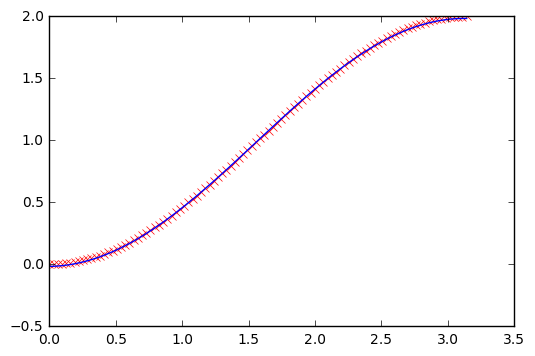

In [32]:
p = plot(x, - cos(x) + cos(0), 'rx')
p = plot(x, result_np)

# Speed Comparisons

In [33]:
import sympy
from sympy.abc import x, theta
sympy_x = x

In [34]:
x = linspace(0, 20 * pi, 1e+4)
y = np.sin(x)
sympy_y = vectorize(lambda x: sympy.integrate(sympy.sin(theta), (theta, 0, x)))

In [42]:
%timeit np.add.accumulate(y) * (x[1] - x[0])
y0 = np.add.accumulate(y) * (x[1] - x[0])
print y0[-1] 

The slowest run took 7.11 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 45.3 µs per loop
-2.34138044756e-17


In [36]:
%timeit quad(np.sin, 0, 20 * pi)
y2 = quad(np.sin, 0, 20 * pi, full_output=True)
print "result = ", y2[0]
print "number of evaluations", y2[-1]['neval']

10000 loops, best of 3: 33.2 µs per loop
result =  3.43781337153e-15
number of evaluations 21


In [37]:
%timeit trapz(y, x)
y1 = trapz(y, x)
print y1

The slowest run took 4.82 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 85.7 µs per loop
-4.4408920985e-16


In [38]:
%timeit simps(y, x)
y3 = simps(y, x)
print y3

1000 loops, best of 3: 503 µs per loop
1.06383950043e-16


In [39]:
%timeit sympy_y(20 * pi)
y4 = sympy_y(20 * pi)
print y4

The slowest run took 10.40 times longer than the fastest. This could mean that an intermediate result is being cached.
100 loops, best of 3: 6.64 ms per loop
0


Copyright 2008-2016, Enthought, Inc.<br>Use only permitted under license.  Copying, sharing, redistributing or other unauthorized use strictly prohibited.<br>http://www.enthought.com